# CLASIFICAR ggF y VBF CON MACHINE LEARNING

## PAQUETES

In [1]:
# dataframes 
import numpy as np
# import pandas as pd
import polars as pd

# cargar archivos
import uproot
from tqdm import tqdm # sirve para ver la linea de carga al cargar los archivos
import yaml

# gráficos
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

# funcion de xgboost que clasifica
from xgboost import XGBClassifier
import xgboost as xgb

# graficar el arbol de desiciones del modelo, rcparams es para que se vea HD
from xgboost import plot_tree
from matplotlib.pylab import rcParams

# medir que tan bueno es el modelo
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# encontrar mejor modelo (validacion)
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score

# ver la prueba de ks
from scipy.stats import kstest

# funciones creadas
import sys
sys.path.append('../') # los archivos están en la carpeta anterior
from lectura import *
from formulas import *
from cortes import *
from graficar import *
from machine_learning import *
from metricas import *

# para recargar los modulos mientras los voy debugeando
%load_ext autoreload
%autoreload 2

# LECTURA DE DATOS

In [2]:
########################################################
########### LECTURA DATOS PREVIOS YAML #################
########################################################

# cargar archivo yaml
path = "/home/tomilee/Desktop/Universidad/dark_photons/proyecto_investigacion/codigo/"
data_yaml = read_data_yaml('../parametros_just_njet30.yaml')      #Parámetros del calo

# de data_yaml obtenemos los nombres de los datasets
vbf_data = data_yaml['VBF'].values() #esto devuelve solo los valores de cada variable.
ggf_data = data_yaml['ggF'].values() #esto devuelve solo los valores de cada variable.

# de data_yaml obtenemos los nombres de las variables
variables = data_yaml['recover_branches']
# de data_yaml obtenemos las escalas de las variables
scales = data_yaml['scale_variable']

# de data_yaml obtenemos los nombres de los cortes y los valores de los cortes menores y mayores
cuts = data_yaml['cuts']

In [3]:
########################################################
############# LECTURA DATOS ROOT FILES #################
########################################################
df_all = read_datasets(vbf_data, ggf_data, variables, scales, path)
df_all

 12%|█▎        | 1/8 [00:00<00:03,  2.20it/s]

samples/VBF/frvz_vbf_500757


 25%|██▌       | 2/8 [00:00<00:02,  2.12it/s]

samples/VBF/frvz_vbf_500758


 38%|███▊      | 3/8 [00:01<00:02,  2.10it/s]

samples/VBF/frvz_vbf_500759


 50%|█████     | 4/8 [00:01<00:01,  2.20it/s]

samples/VBF/frvz_vbf_500760


 62%|██████▎   | 5/8 [00:02<00:01,  2.21it/s]

samples/VBF/frvz_vbf_500761


 75%|███████▌  | 6/8 [00:02<00:00,  2.16it/s]

samples/VBF/frvz_vbf_500762


 88%|████████▊ | 7/8 [00:03<00:00,  2.25it/s]

samples/VBF/frvz_vbf_500763


100%|██████████| 8/8 [00:03<00:00,  2.21it/s]


samples/VBF/frvz_vbf_500764


100%|██████████| 9/9 [00:15<00:00,  1.68s/it]


njet30          mjj      detajj  \
origin df_name                                                        
VBF    samples/VBF/frvz_vbf_500757       2  1316.194214    5.130603   
       samples/VBF/frvz_vbf_500757       7  2287.880371    7.156201   
       samples/VBF/frvz_vbf_500757       2  1568.506470    6.255918   
       samples/VBF/frvz_vbf_500757       4   471.740875    1.960242   
       samples/VBF/frvz_vbf_500757       8  1150.059692    4.557185   
...                                    ...          ...         ...   
ggF    samples/ggF/frvz_ggf_508893       1    -0.999000 -999.000000   
       samples/ggF/frvz_ggf_508893       3   240.689178    1.942230   
       samples/ggF/frvz_ggf_508893       2   143.422470    2.548514   
       samples/ggF/frvz_ggf_508893       0    -0.999000 -999.000000   
       samples/ggF/frvz_ggf_508893       0    -0.999000 -999.000000   

                                        dphijj         MET  scale1fb  \
origin df_name                                                         
VBF    samples/VBF/frvz_vbf_500757    1.032967  177.043106  0.000486   
       samples/VBF/frvz_vbf_500757   -2.580441  101.195091  0.000502   
       samples/VBF/frvz_vbf_500757   -1.375577  130.909744  0.000429   
       samples/VBF/frvz_vbf_500757    2.980181  491.291687  0.000531   
       samples/VBF/frvz_vbf_500757    2.197970  115.439743  0.000014   
...                                        ...         ...       ...   
ggF    samples/ggF/frvz_ggf_508893 -999.000000   40.554482  0.028479   
       samples/ggF/frvz_ggf_508893    0.768057   76.802452  0.029882   
       samples/ggF/frvz_ggf_508893    2.000947   26.644657  0.029517   
       samples/ggF/frvz_ggf_508893 -999.000000   10.709071  0.029929   
       samples/ggF/frvz_ggf_508893 -999.000000   10.808948  0.030318   

                                      intLumi        jet1_pt    jet1_eta  \
origin df_name                                                             
VBF    samples/VBF/frvz_vbf_500757  44.299999  104969.406250   -3.187121   
       samples/VBF/frvz_vbf_500757  44.299999   72039.820312    3.637084   
       samples/VBF/frvz_vbf_500757  44.299999  120273.304688   -2.382490   
       samples/VBF/frvz_vbf_500757  44.299999  178915.984375    1.259632   
       samples/VBF/frvz_vbf_500757  44.299999  189834.156250   -2.913896   
...                                       ...            ...         ...   
ggF    samples/ggF/frvz_ggf_508893  58.450001   33552.746094    0.995871   
       samples/ggF/frvz_ggf_508893  58.450001  125251.289062   -2.288580   
       samples/ggF/frvz_ggf_508893  58.450001   40318.128906   -3.305732   
       samples/ggF/frvz_ggf_508893  58.450001    -999.000000 -999.000000   
       samples/ggF/frvz_ggf_508893  58.450001    -999.000000 -999.000000   

                                      jet1_phi        jet1_e        jet2_pt  \
origin df_name                                                                
VBF    samples/VBF/frvz_vbf_500757   -0.087903  1.273288e+06   98169.875000   
       samples/VBF/frvz_vbf_500757    0.712928  1.369027e+06   56599.265625   
       samples/VBF/frvz_vbf_500757   -2.404870  6.569827e+05   39280.699219   
       samples/VBF/frvz_vbf_500757   -2.167910  3.411552e+05  133583.312500   
       samples/VBF/frvz_vbf_500757   -1.059290  1.754382e+06   72083.078125   
...                                        ...           ...            ...   
ggF    samples/ggF/frvz_ggf_508893   -2.499207  5.242589e+04    -999.000000   
       samples/ggF/frvz_ggf_508893    1.335905  6.239932e+05   79405.820312   
       samples/ggF/frvz_ggf_508893    0.382778  5.504859e+05   36411.175781   
       samples/ggF/frvz_ggf_508893 -999.000000 -9.990000e+02    -999.000000   
       samples/ggF/frvz_ggf_508893 -999.000000 -9.990000e+02    -999.000000   

                                      jet2_eta    jet2_phi        jet2_e  
origin df_name                                                            
VBF    s

array([[<Axes: title={'center': 'njet30'}>,
        <Axes: title={'center': 'mjj'}>,
        <Axes: title={'center': 'detajj'}>,
        <Axes: title={'center': 'dphijj'}>],
       [<Axes: title={'center': 'MET'}>,
        <Axes: title={'center': 'scale1fb'}>,
        <Axes: title={'center': 'intLumi'}>,
        <Axes: title={'center': 'jet1_pt'}>],
       [<Axes: title={'center': 'jet1_eta'}>,
        <Axes: title={'center': 'jet1_phi'}>,
        <Axes: title={'center': 'jet1_e'}>,
        <Axes: title={'center': 'jet2_pt'}>],
       [<Axes: title={'center': 'jet2_eta'}>,
        <Axes: title={'center': 'jet2_phi'}>,
        <Axes: title={'center': 'jet2_e'}>, <Axes: >]], dtype=object)

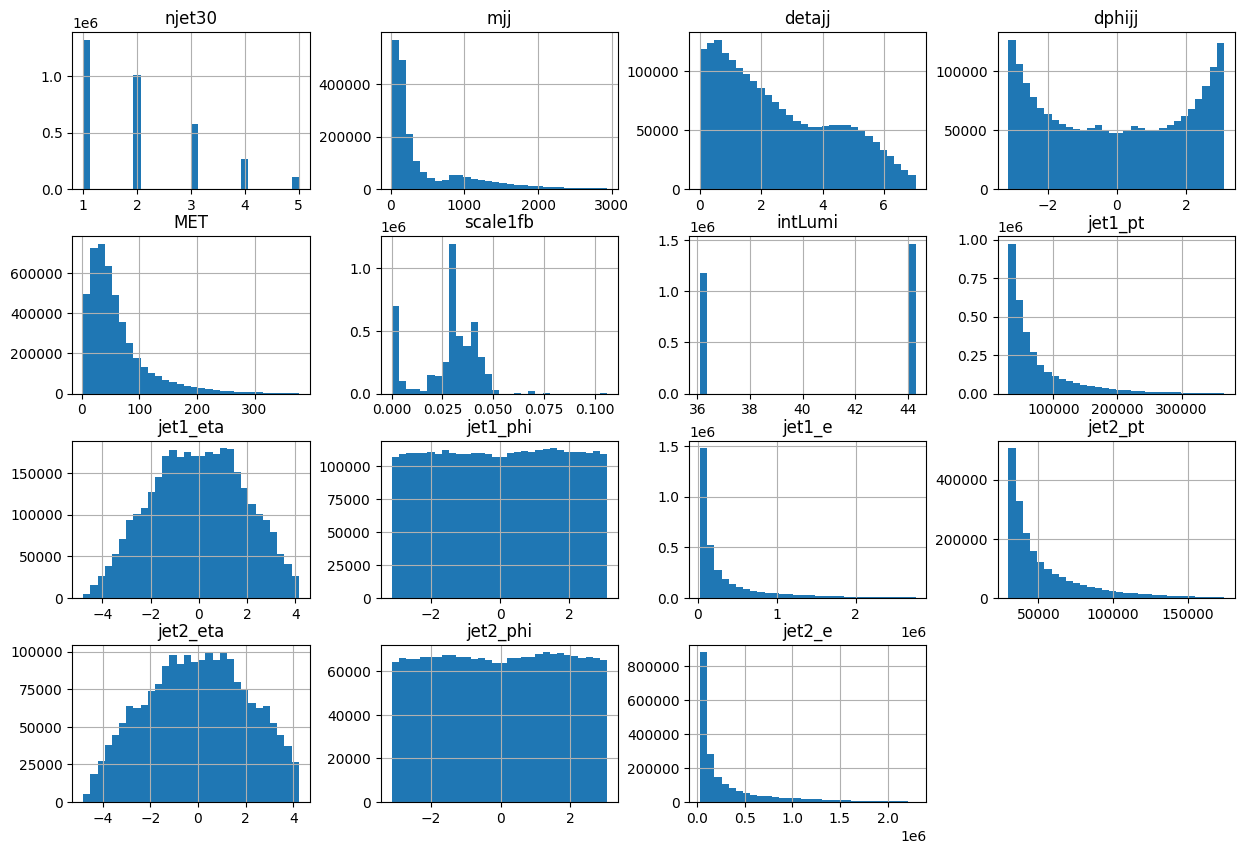

In [4]:
df_plot = df_all[(df_all > df_all.quantile(0.005)) & (df_all < df_all.quantile(0.995))]

df_plot.hist(bins=30, figsize=(15, 10))

# CORTES Y PREPROCESADO

In [5]:
#################################################################
#################### PROCESAMIENTO DE DATOS #####################
#################################################################

# hago los cortes definitivos
df_all_cut = do_cuts(df_all, cuts, scales)

# modifico df_all para aplicar ml
df_ml = df_all_cut
df_ml = df_ml.droplevel('df_name')
df_ml = df_ml.drop(['njet30', 'scale1fb', 'intLumi'], axis=1) # omito njet30, intlumi y scale1f
df_ml = df_ml.reset_index(level='origin')
df_ml = pd.get_dummies(df_ml, columns=['origin'], dtype=int)

# separo entre datos de entrenamiento y datos de validacion
df_X = df_ml.drop(['origin_VBF', 'origin_ggF'], axis=1) 
df_y = df_ml[["origin_VBF"]]

# separo entre datos de entrenamiento y datos de validacion
X_train, X_metrico, y_train, y_metrico = train_test_split(df_X, df_y, test_size=0.3)#, random_state=123)
X_test, X_val, y_test, y_val = train_test_split(X_metrico, y_metrico, test_size=0.5)

df_ml

Numero eventos antes: 4628576
Corte: njet30 entre [1, inf]
Numero eventos despues: 2013265 



,mjj,detajj,dphijj,MET,jet1_pt,jet1_eta,jet1_phi,jet1_e,jet2_pt,jet2_eta,jet2_phi,jet2_e,origin_VBF,origin_ggF
0,1316.194214,5.130603,1.032967,177.043106,104969.406250,-3.187121,-0.087903,1.273288e+06,98169.875000,1.943482,-1.120870,3.498132e+05,1,0
1,2287.880371,7.156201,-2.580441,101.195091,72039.820312,3.637084,0.712928,1.369027e+06,56599.265625,-3.519117,-2.989815,9.561007e+05,1,0
2,1568.506470,6.255918,-1.375577,130.909744,120273.304688,-2.382490,-2.404870,6.569827e+05,39280.699219,3.873428,-1.029293,9.452691e+05,1,0
3,471.740875,1.960242,2.980181,491.291687,178915.984375,1.259632,-2.167910,3.411552e+05,133583.312500,3.219874,1.135094,1.674184e+06,1,0
4,1150.059692,4.557185,2.197970,115.439743,189834.156250,-2.913896,-1.059290,1.754382e+06,72083.078125,1.643289,3.025926,1.938794e+05,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012571,86.820213,0.779352,3.074377,36.471001,45681.097656,3.302509,-0.662832,6.216837e+05,35162.062500,2.523157,2.545976,2.206442e+05,0,1
2012572,69.304848,0.293507,-2.302855,5.845552,40501.546875,1.277558,-3.141293,7.845353e+04,33459.644531,0.984051,-0.838438,5.148936e+04,0,1
2012573,506.555878,2.252506,-3.031298,27.214394,152246.031250,1.397108,1.148800,3.269545e+05,144588.734375,-0.855398,-2.103087,2.015532e+05,0,1
2012574,240.689178,1.942230,0.768057,76.802452,125251.289062,-2.288580,1.335905,6.239932e+05,79405.820312,-0.346350,0.567848,8.514269e+04,0,1


array([[<Axes: title={'center': 'njet30'}>,
        <Axes: title={'center': 'mjj'}>,
        <Axes: title={'center': 'detajj'}>,
        <Axes: title={'center': 'dphijj'}>],
       [<Axes: title={'center': 'MET'}>,
        <Axes: title={'center': 'scale1fb'}>,
        <Axes: title={'center': 'intLumi'}>,
        <Axes: title={'center': 'jet1_pt'}>],
       [<Axes: title={'center': 'jet1_eta'}>,
        <Axes: title={'center': 'jet1_phi'}>,
        <Axes: title={'center': 'jet1_e'}>,
        <Axes: title={'center': 'jet2_pt'}>],
       [<Axes: title={'center': 'jet2_eta'}>,
        <Axes: title={'center': 'jet2_phi'}>,
        <Axes: title={'center': 'jet2_e'}>, <Axes: >]], dtype=object)

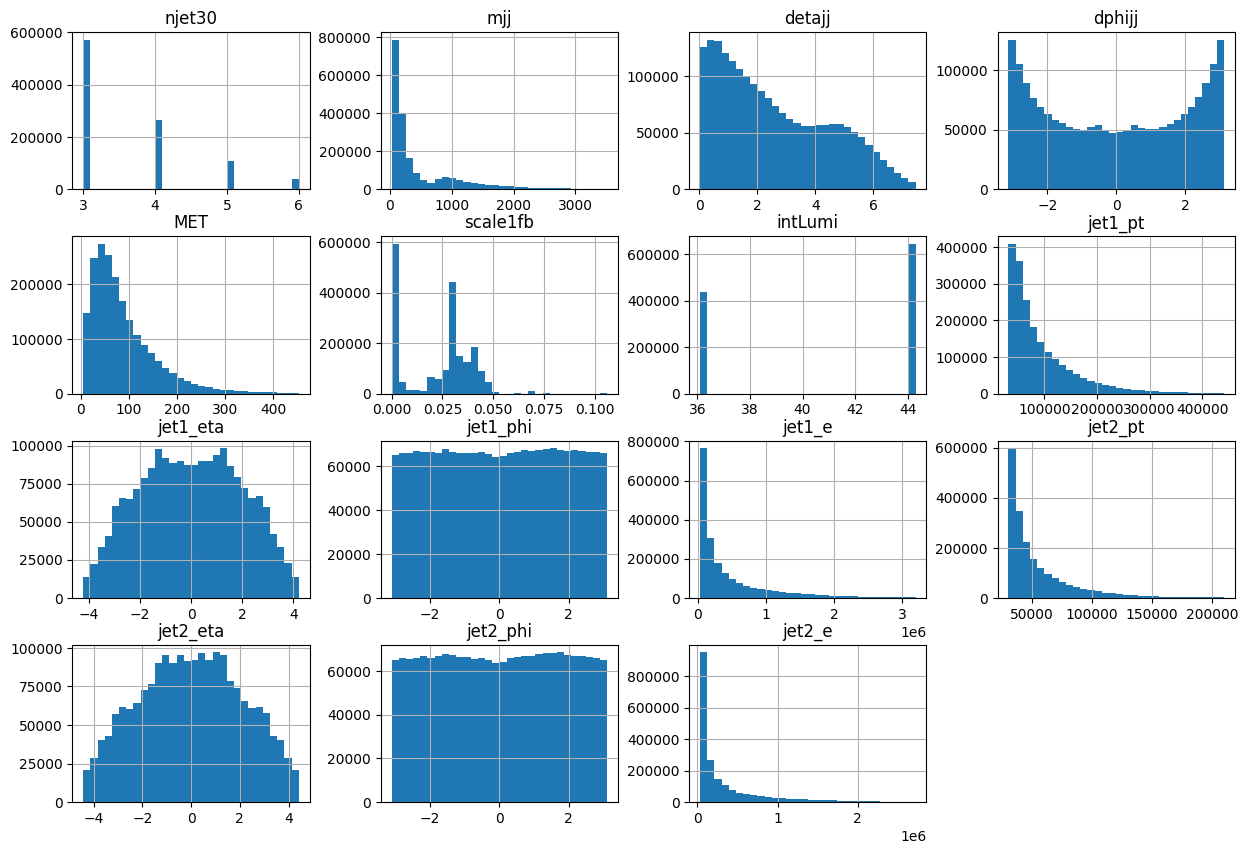

In [6]:
df_plot = df_all_cut[(df_all_cut > df_all_cut.quantile(0.005)) & (df_all_cut < df_all_cut.quantile(0.995))]

df_plot.hist(bins=30, figsize=(15, 10))

# ANALISIS PREVIO

In [7]:
# veamos si hago bien el corte de njet30
# sns.histplot(data = df_all["njet30"], bins=30)
# sí se borraban cosas, habian datos originalmente con njet30 con valores 0 o 1, la cosa que me decía el número de entradas antes y después no estaba actualizado para el código actual

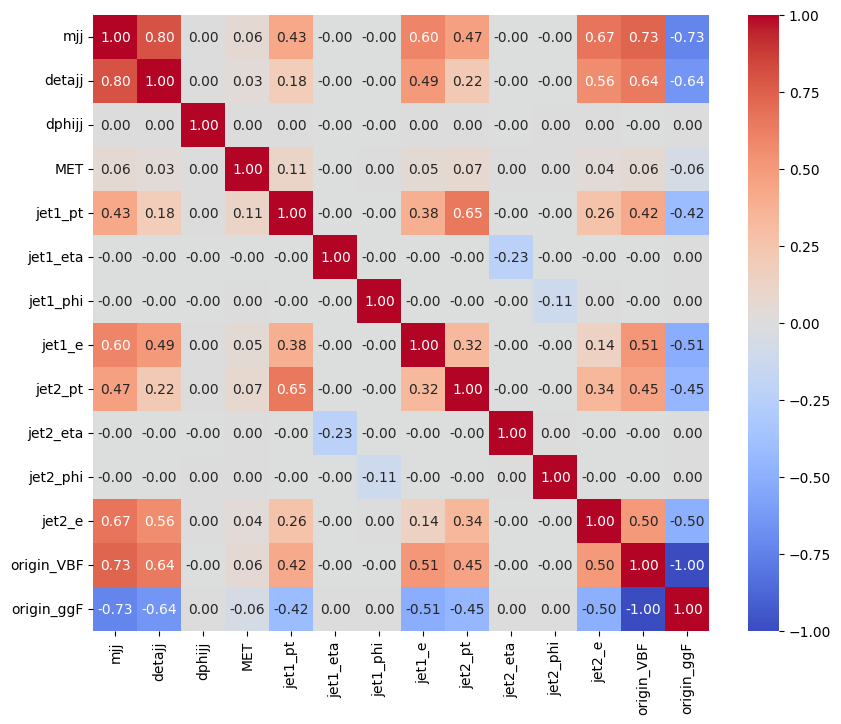

In [8]:
########################################################
##################### CORRELACION ######################
########################################################

plot_correlacion(df_ml)

In [9]:
# ver las correlaciones en orden de importancia con origin vbf
correlaciones(df_ml, "origin_VBF")

origin_VBF    1.000000
mjj           0.734283
detajj        0.641705
jet1_e        0.513482
jet2_e        0.498435
jet2_pt       0.446498
jet1_pt       0.420065
MET           0.061332
dphijj       -0.000212
jet1_phi     -0.000397
jet2_eta     -0.001333
jet1_eta     -0.001530
jet2_phi     -0.002847
origin_ggF   -1.000000
Name: origin_VBF, dtype: float64

borro las de menor relevancia: MET, jet1_phi, jet2_eta, dphijj, jet2_phi, jet1_eta
Ademas borro MET porque no aporta en nada

# PREPROCESADO MEJORADO TRAS ANALISIS

# AQUI ELIMINO MJJ

In [10]:
df_ml['origin_ggF']
df_ml2 = df_ml.drop(['jet2_eta', 'jet1_eta', 'jet2_phi', 'MET', 'origin_ggF', 'dphijj', 'jet1_phi', 'mjj'], axis=1)

# separo entre datos de entrenamiento y datos de validacion
df_X = df_ml2.drop(['origin_VBF'], axis=1) 
df_y = df_ml2[["origin_VBF"]]
# df_y = df_ml[["origin_ggF"]]

# separo entre datos de entrenamiento y datos de validacion
X_train, X_metrico, y_train, y_metrico = train_test_split(df_X, df_y, test_size=0.3, random_state=228)
X_test, X_val, y_test, y_val = train_test_split(X_metrico, y_metrico, test_size=0.5, random_state=228)
# X_test, y_test = X_metrico, y_metrico 

df_ml2

,detajj,jet1_pt,jet1_e,jet2_pt,jet2_e,origin_VBF
0,5.130603,104969.406250,1.273288e+06,98169.875000,3.498132e+05,1
1,7.156201,72039.820312,1.369027e+06,56599.265625,9.561007e+05,1
2,6.255918,120273.304688,6.569827e+05,39280.699219,9.452691e+05,1
3,1.960242,178915.984375,3.411552e+05,133583.312500,1.674184e+06,1
4,4.557185,189834.156250,1.754382e+06,72083.078125,1.938794e+05,1
...,...,...,...,...,...,...
2012571,0.779352,45681.097656,6.216837e+05,35162.062500,2.206442e+05,0
2012572,0.293507,40501.546875,7.845353e+04,33459.644531,5.148936e+04,0
2012573,2.252506,152246.031250,3.269545e+05,144588.734375,2.015532e+05,0
2012574,1.942230,125251.289062,6.239932e+05,79405.820312,8.514269e+04,0


nota: no cambió en nada el resultado, no afectó las cosas que borré

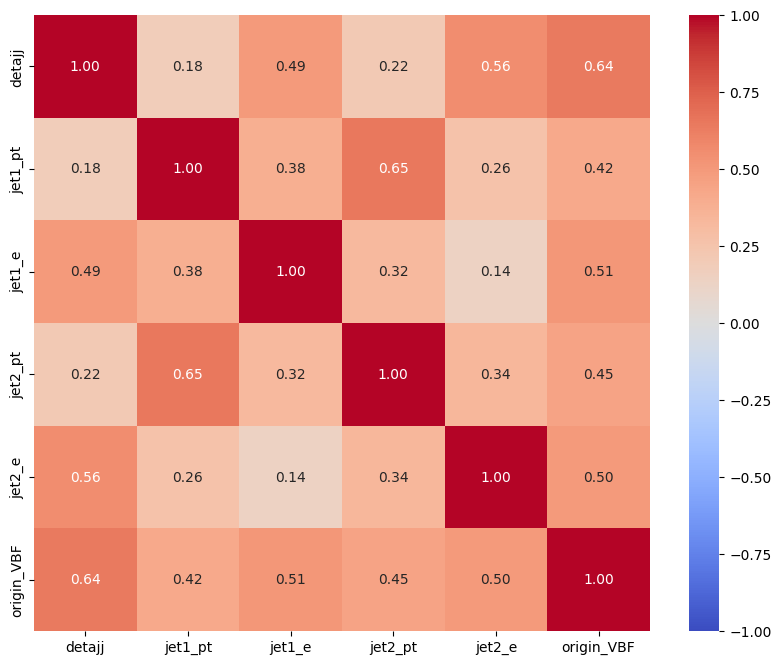

In [11]:
plot_correlacion(df_ml2)

In [12]:
correlaciones(df_ml2, "origin_VBF")

origin_VBF    1.000000
detajj        0.641705
jet1_e        0.513482
jet2_e        0.498435
jet2_pt       0.446498
jet1_pt       0.420065
Name: origin_VBF, dtype: float64

array([[<Axes: title={'center': 'detajj'}>,
        <Axes: title={'center': 'jet1_pt'}>],
       [<Axes: title={'center': 'jet1_e'}>,
        <Axes: title={'center': 'jet2_pt'}>],
       [<Axes: title={'center': 'jet2_e'}>,
        <Axes: title={'center': 'origin_VBF'}>]], dtype=object)

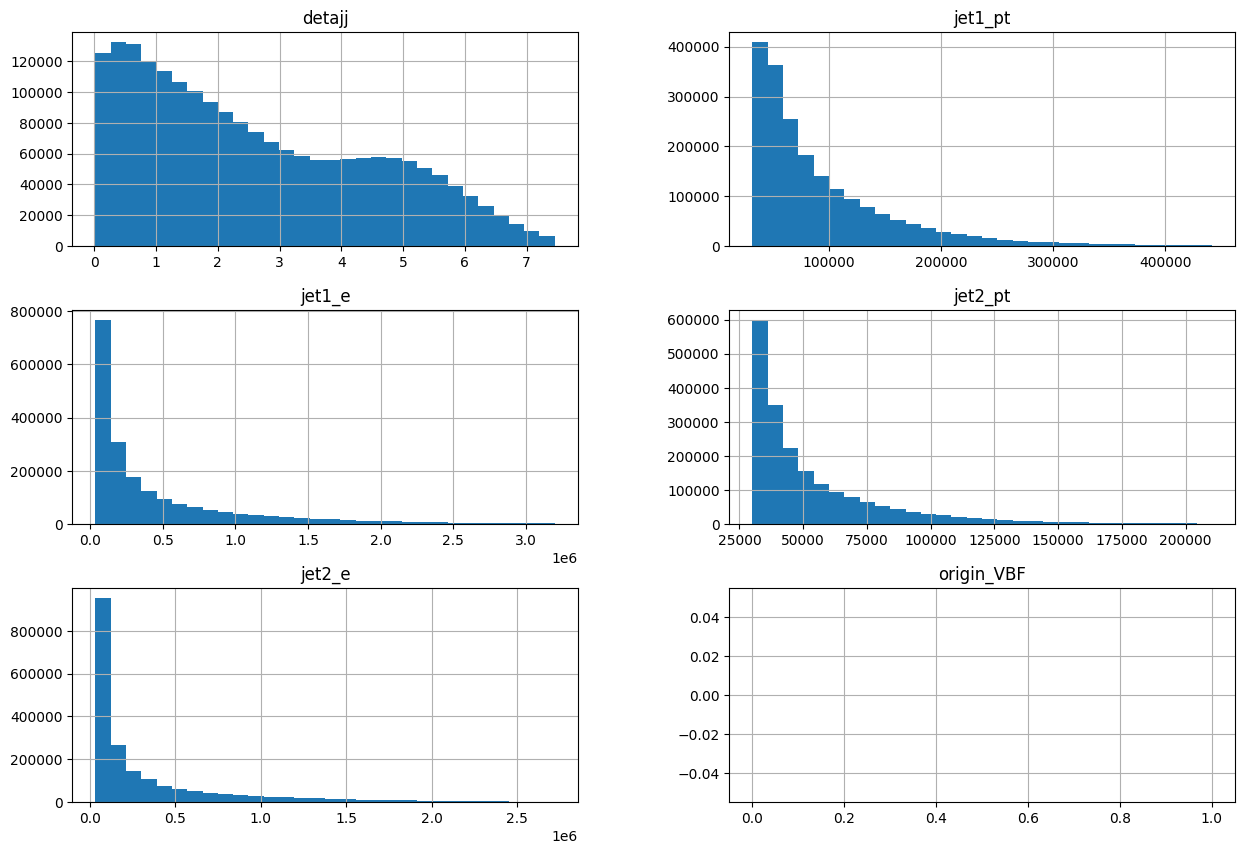

In [13]:
df_plot = df_ml2[(df_ml2 > df_ml2.quantile(0.005)) & (df_ml2 < df_ml2.quantile(0.995))]

df_plot.hist(bins=30, figsize=(15, 10))

# ANALISIS DE DATOS

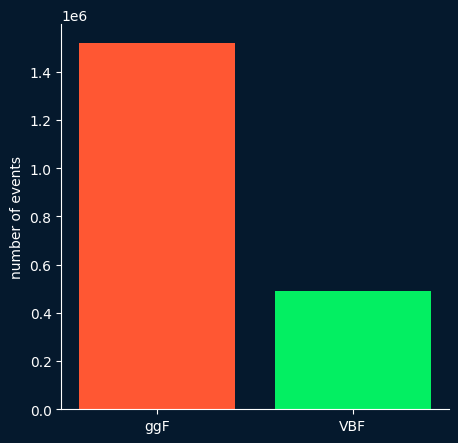

           detajj        jet1_pt        jet1_e        jet2_pt        jet2_e  \
0        5.130603  104969.406250  1.273288e+06   98169.875000  3.498132e+05   
1        7.156201   72039.820312  1.369027e+06   56599.265625  9.561007e+05   
2        6.255918  120273.304688  6.569827e+05   39280.699219  9.452691e+05   
3        1.960242  178915.984375  3.411552e+05  133583.312500  1.674184e+06   
4        4.557185  189834.156250  1.754382e+06   72083.078125  1.938794e+05   
...           ...            ...           ...            ...           ...   
2012571  0.779352   45681.097656  6.216837e+05   35162.062500  2.206442e+05   
2012572  0.293507   40501.546875  7.845353e+04   33459.644531  5.148936e+04   
2012573  2.252506  152246.031250  3.269545e+05  144588.734375  2.015532e+05   
2012574  1.942230  125251.289062  6.239932e+05   79405.820312  8.514269e+04   
2012575  2.548514   40318.128906  5.504859e+05   36411.175781  4.770174e+04   

         origin_VBF  
0                 1  
1      

In [14]:
n_ggF = df_ml2[df_ml2["origin_VBF"] == 0].count()[0]
n_VBF = df_ml2[df_ml2["origin_VBF"] == 1].count()[0]
plot_cantidad_ggf_vbf(n_ggF, n_VBF)
print(df_ml2)

# MACHINE LEARNING

In [15]:
from bokbokbok.eval_metrics.classification import F1_Score_Binary
from sklearn.metrics import f1_score

params = {'seed': 123,
          "learning_rate":0.1,
          "max_depth":7,
          # "n_estimators":500,
          "eval_metric":["logloss", "auc"],
          "verbosity":2,
          "objective":"binary:logistic",
          "gamma":0.1, # esto es para evitar el sobreajuste, limita la creacion de ramas
          # 'disable_default_eval_metric': 1, # no usa las metricas de evaluacion que puse arribita (eval_metric)
        #   "device":"cuda"
          }

dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_val, y_val)

modelo_boost = xgb.train(params,
          dtrain=dtrain,
          num_boost_round=100,
          early_stopping_rounds=10,
          verbose_eval=10,
          maximize=True,
          custom_metric=F1_Score_Binary(average='binary', XGBoost=True),
          # custom_metric=f1_score(average='micro'),
          evals=[(dtrain, 'dtrain'), (dvalid, 'dvalid')])

modelo = XGBRegressor()
modelo._Booster = modelo_boost

[0]	dtrain-logloss:0.48968	dtrain-auc:0.97343	dtrain-F1:0.00000	dvalid-logloss:0.48956	dvalid-auc:0.97307	dvalid-F1:0.00000
[10]	dtrain-logloss:0.24068	dtrain-auc:0.97589	dtrain-F1:0.87612	dvalid-logloss:0.24098	dvalid-auc:0.97548	dvalid-F1:0.87553
[20]	dtrain-logloss:0.18266	dtrain-auc:0.97635	dtrain-F1:0.88002	dvalid-logloss:0.18328	dvalid-auc:0.97587	dvalid-F1:0.87981
[30]	dtrain-logloss:0.16634	dtrain-auc:0.97665	dtrain-F1:0.88097	dvalid-logloss:0.16725	dvalid-auc:0.97617	dvalid-F1:0.88083
[40]	dtrain-logloss:0.16162	dtrain-auc:0.97682	dtrain-F1:0.88129	dvalid-logloss:0.16281	dvalid-auc:0.97627	dvalid-F1:0.88109
[50]	dtrain-logloss:0.16003	dtrain-auc:0.97698	dtrain-F1:0.88165	dvalid-logloss:0.16150	dvalid-auc:0.97634	dvalid-F1:0.88116
[60]	dtrain-logloss:0.15928	dtrain-auc:0.97713	dtrain-F1:0.88194	dvalid-logloss:0.16104	dvalid-auc:0.97639	dvalid-F1:0.88121
[70]	dtrain-logloss:0.15885	dtrain-auc:0.97725	dtrain-F1:0.88217	dvalid-logloss:0.16091	dvalid-auc:0.97641	dvalid-F1:0.88131
[

In [16]:
modelo

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

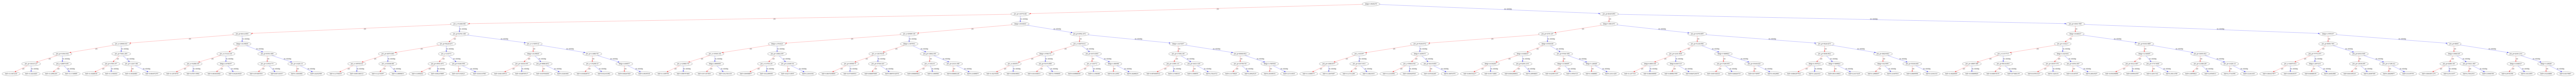

In [17]:
grafico_decisiones(modelo)

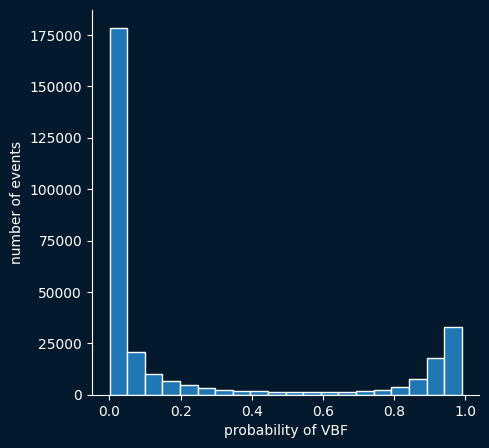

In [18]:
plot_number_events_hist(modelo, X_test)

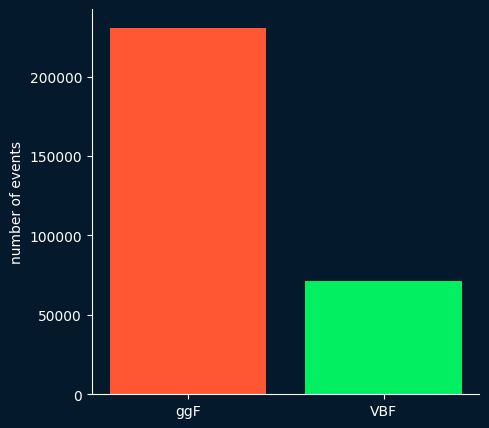

230840
71046
0.7646595072312065
0.2353404927687935


In [19]:
y_pred = modelo.predict(X_test)
n_ggF = y_pred[y_pred<0.5].shape[0]
n_VBF = y_pred[y_pred>0.5].shape[0]

plot_cantidad_ggf_vbf(n_ggF, n_VBF)

ggf_percentage = n_ggF/(n_ggF+n_VBF)
vbf_percentage = n_VBF/(n_ggF+n_VBF)

print(n_ggF)
print(n_VBF)
print(ggf_percentage)
print(vbf_percentage)

In [20]:
precision(modelo, X_test, y_test)

Precisión del modelo: 94.25%


In [21]:
y_pred = modelo.predict(X_test)
y_pred = y_pred>0.5
matriz = confusion(y_test, y_pred)
pd.DataFrame(matriz)

,0,1
0,63662,9976
1,7384,220864


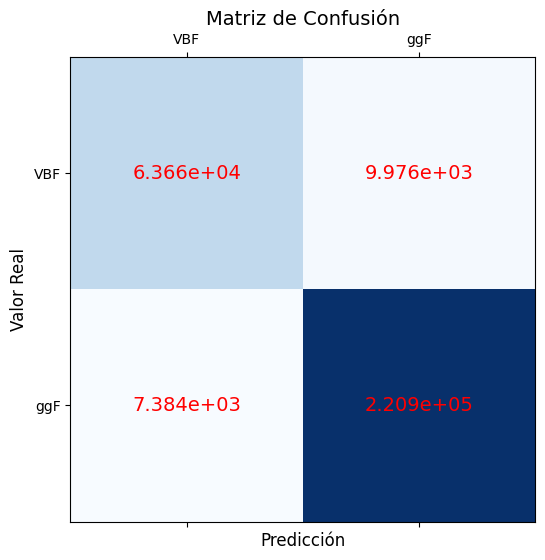

In [38]:
plot_matriz(matriz, porcentaje = False, normalizado=False)

In [39]:
def eficiencia_corte_matriz(matriz):
    eventos_antes = matriz[0][0] + matriz[0][1] + matriz[1][0] + matriz[1][1]
    eventos_despues = matriz[0][0] + matriz[1][0]
    eficiencia = eventos_despues/eventos_antes
    return eficiencia

print(eficiencia_corte_matriz(matriz))

0.2353404927687935


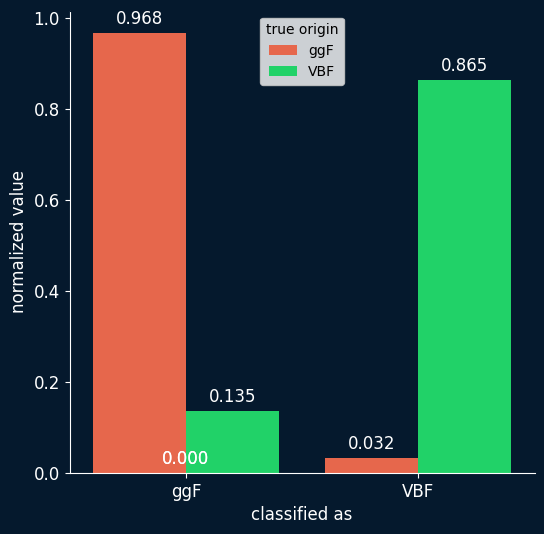

In [24]:
plot_confusion_barras(matriz)

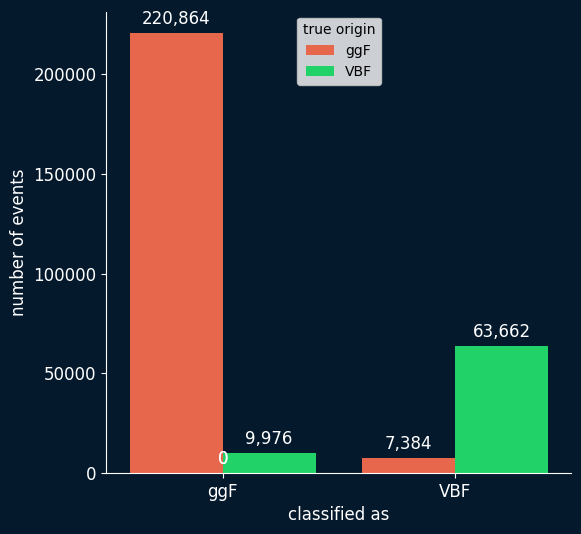

In [25]:
plot_confusion_barras(matriz, normalizado=False)

In [26]:
# Encontrar mejor modelo
# best_model = find_best_model(X_train, y_train, X_test, y_test, X_val, y_val)

In [27]:
from sklearn.metrics import f1_score
y_pred = modelo.predict(X_test)
f1_score(y_test, y_pred>0.5)

0.8800143761576953

In [28]:
modelo

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# # Supongamos que 'X' es tu conjunto de datos original
# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(df_X.sample(100, random_state=1))
# # X_tsne = tsne.fit_transform(df_X)

In [30]:
# plt.figure(figsize=[5, 5])
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_y.sample(100, random_state=1).to_numpy(), cmap='viridis', marker='.')
# # plt.plot(X_tsne[:, 0], X_tsne[:, 1])
# plt.show()

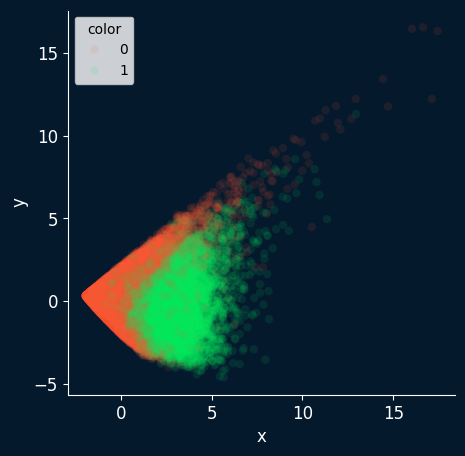

In [31]:
plot_pca_2D(modelo, 
            df_X.sample(100000, random_state=123), 
            df_y.sample(100000, random_state=123))
        #  pd.DataFrame(modelo.predict(df_X)).sample(100000, random_state=123))

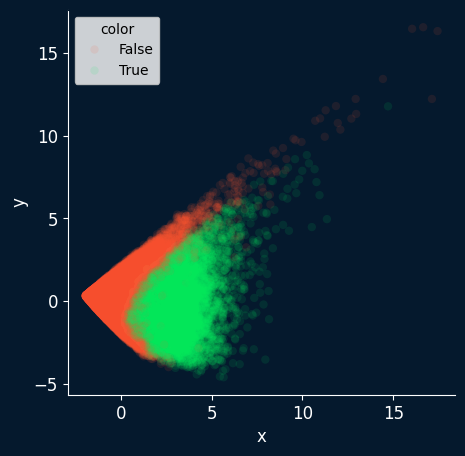

In [32]:
plot_pca_2D(modelo, 
            df_X.sample(100000, random_state=123), 
            # df_y.sample(100000, random_state=123))
            pd.DataFrame(modelo.predict(df_X)>0.5).sample(100000, random_state=123))

In [33]:
importancia = dict(zip(modelo.feature_names_in_, modelo.feature_importances_))
df_importancia = pd.DataFrame(modelo.feature_importances_, index=modelo.feature_names_in_, columns=["importances"])
importancias_ordenadas = df_importancia.sort_values(by=["importances"], ascending=False)
importancias_ordenadas

,importances
detajj,0.631478
jet1_pt,0.230727
jet1_e,0.073516
jet2_pt,0.051296
jet2_e,0.012983


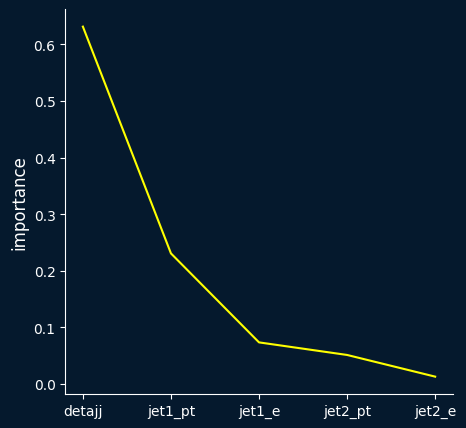

In [34]:
fig, ax = plt.subplots(figsize=[5, 5])
ax.plot(importancias_ordenadas, color='yellow')
ax.set_ylabel("importance", color='white', fontsize=12)

# color del fondo
fondo_color = "#05192d"
colores_hue = {"ggF": "#FF5733", "VBF": "#03ef62"}
blanco = "#ffffff"
fig.set_facecolor(fondo_color)
ax.set_facecolor(fondo_color)

# Eliminar la parte superior y derecha del cuadrado que envuelve el gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Cambiar el color de los ejes
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Cambiar el color de los números en los ejes
ax.tick_params(axis='x', colors='white')  # Eje x
ax.tick_params(axis='y', colors='white')  # Eje y


plt.show()

detajj


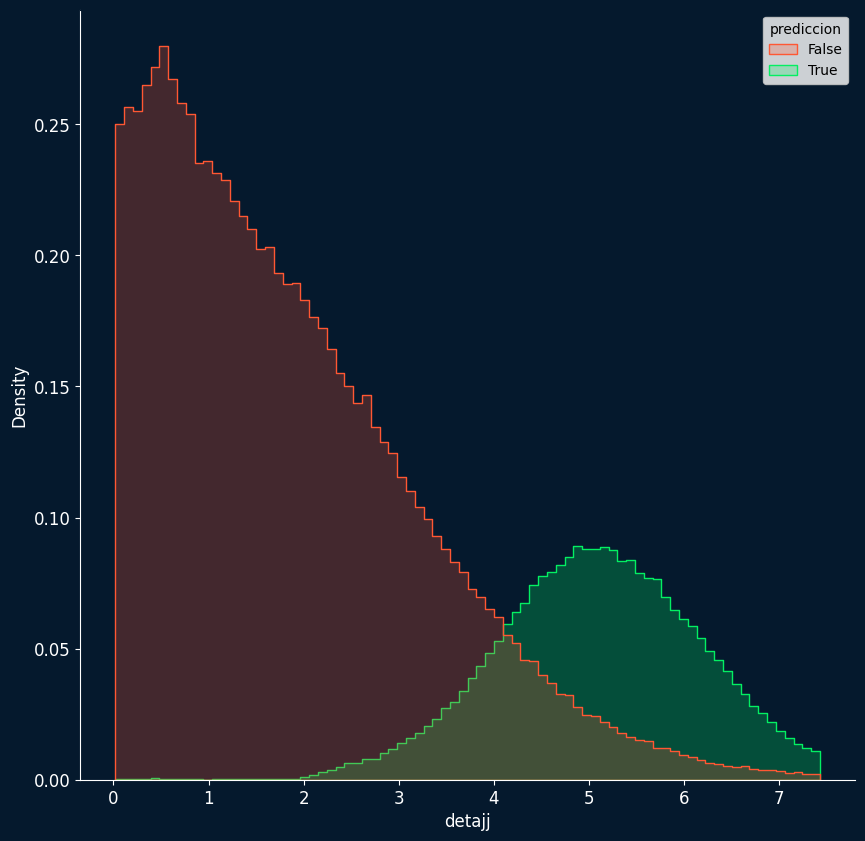

jet1_pt


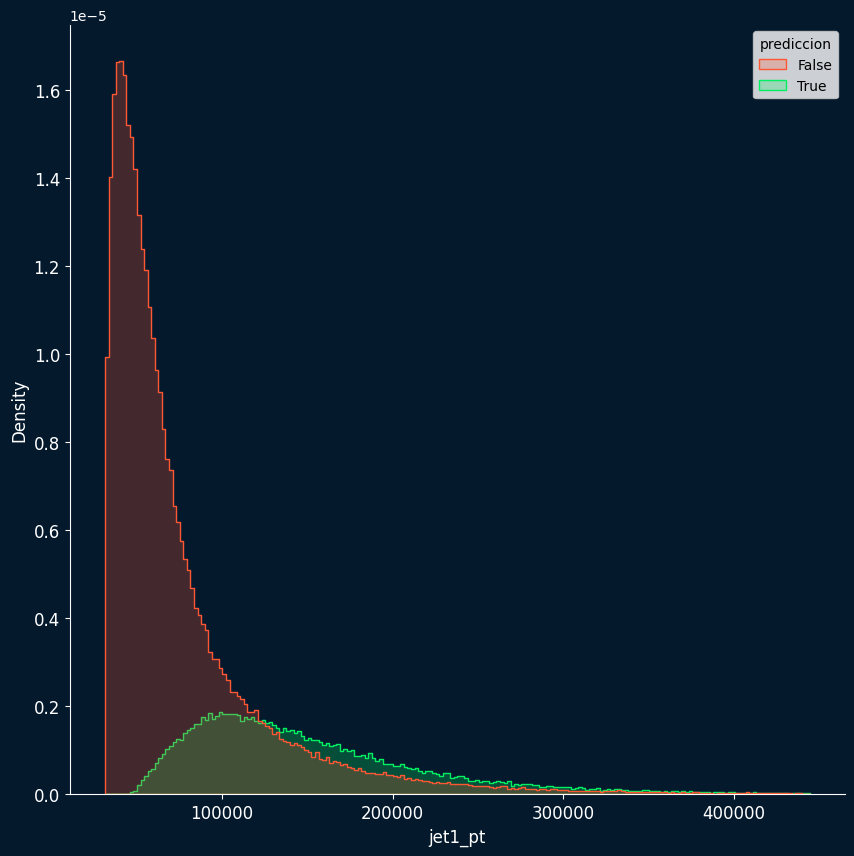

jet1_e


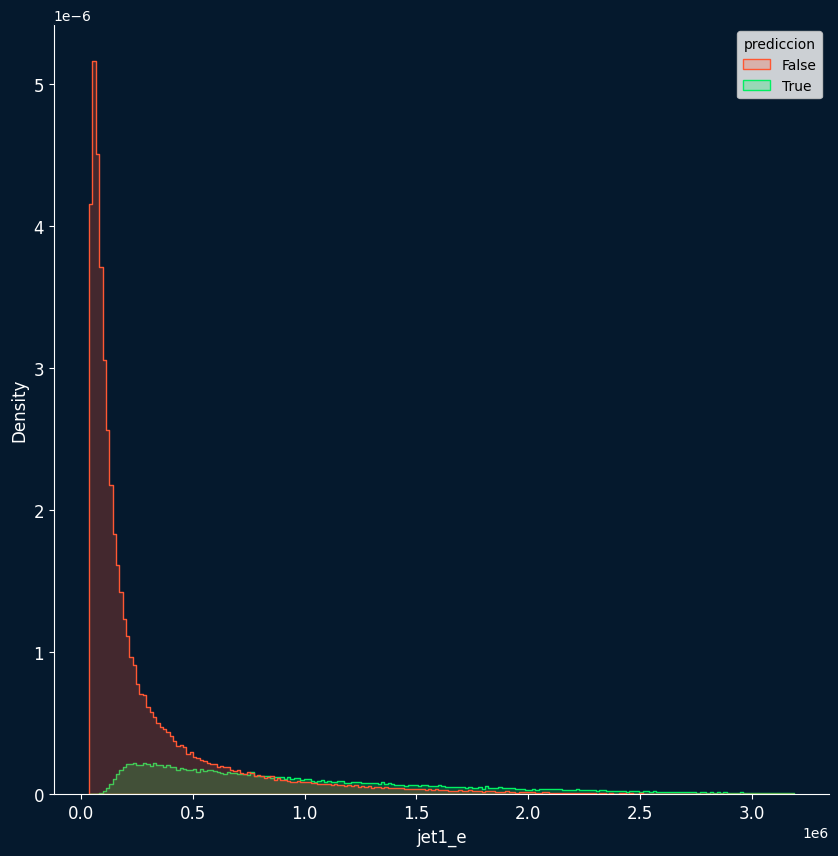

jet2_pt


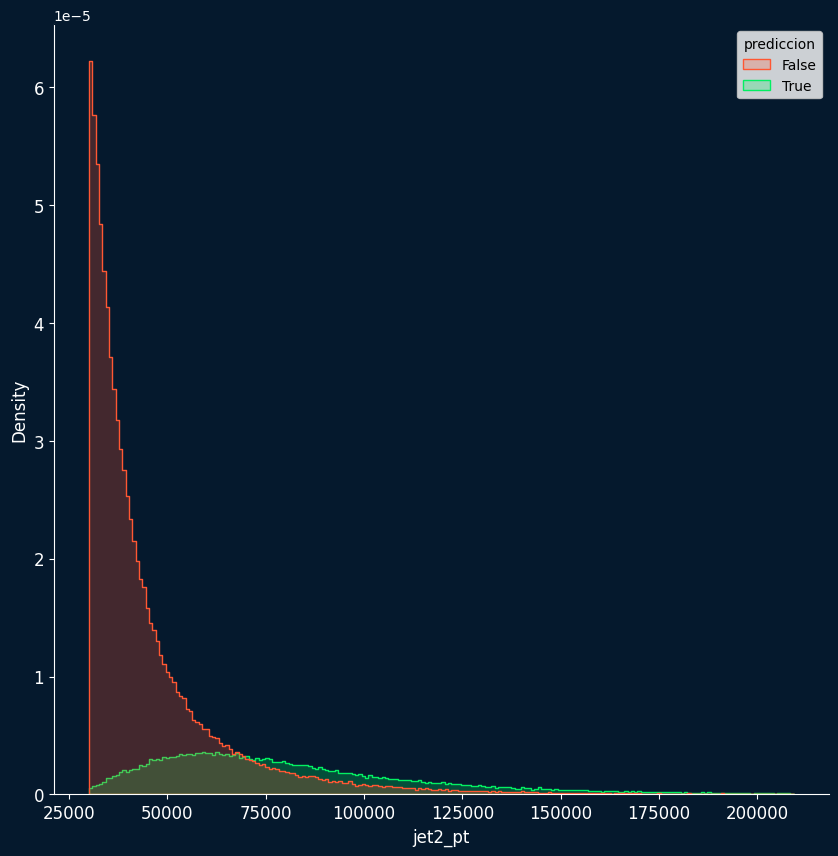

jet2_e


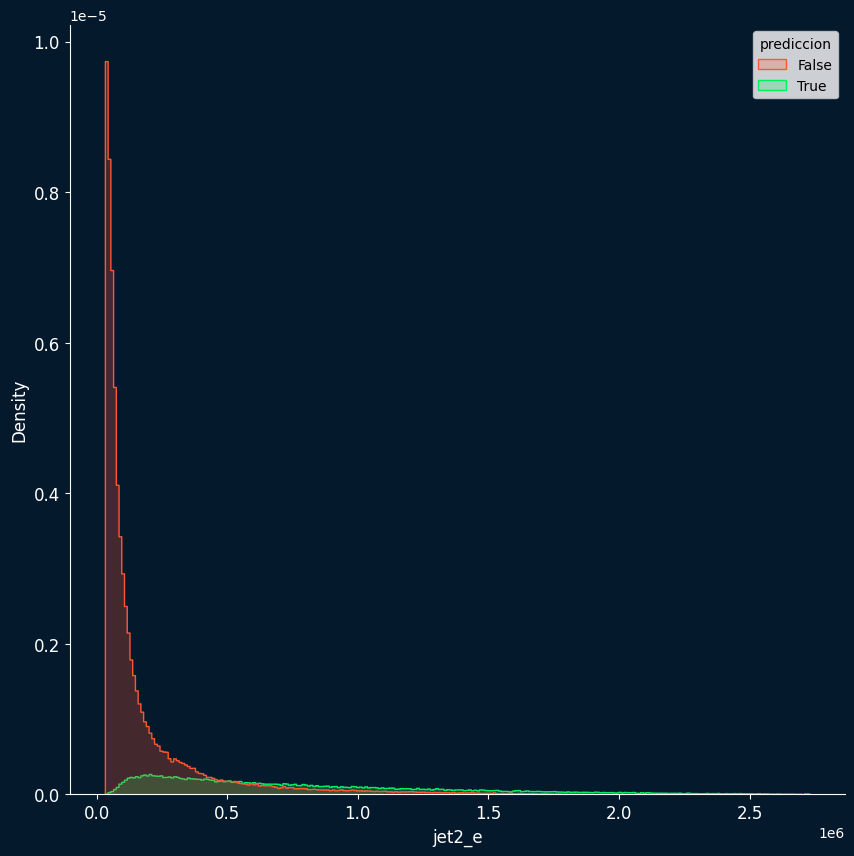

prediccion


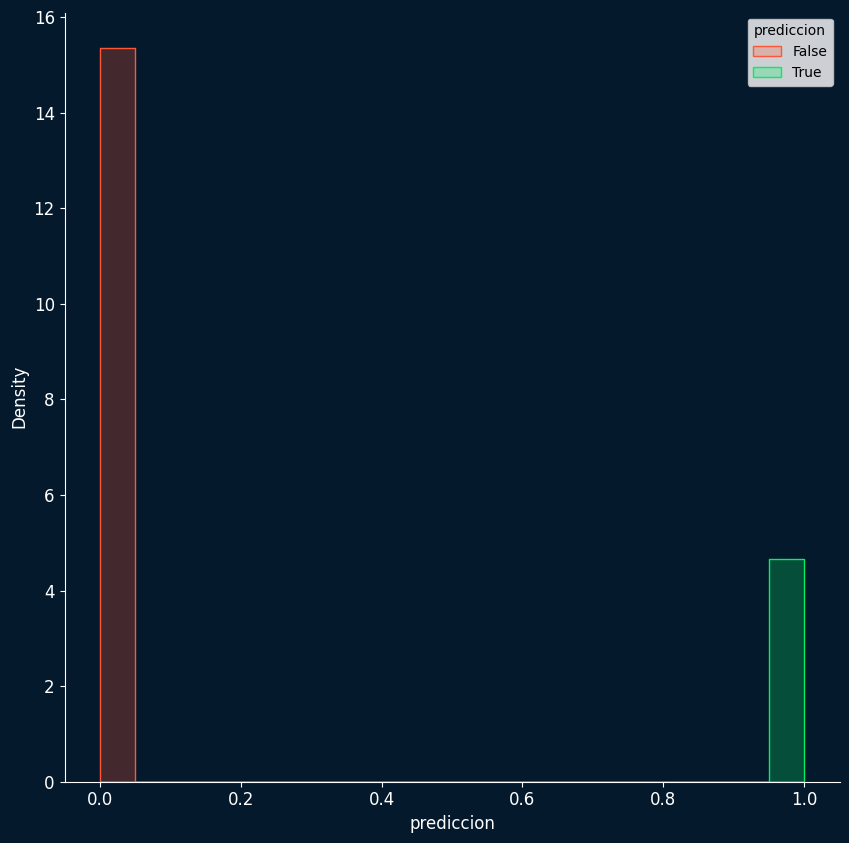

In [35]:
# df_ml3 = df_ml2
df_ml3 = X_test.copy(deep=True)
try: 
    df_ml3 = df_ml3.drop(['prediccion'], axis=1) # por si lo corro 2 veces y se queda guardado 'prediccion'
except:
    pass
try: 
    df_ml3 = df_ml3.drop(['origin_VBF'], axis=1) # por si lo corro 2 veces y se queda guardado 'prediccion'
except:
    pass
df_ml3['prediccion'] = modelo.predict(df_ml3)>0.5
graficar_todos_datos(df_ml3, color='prediccion')

detajj


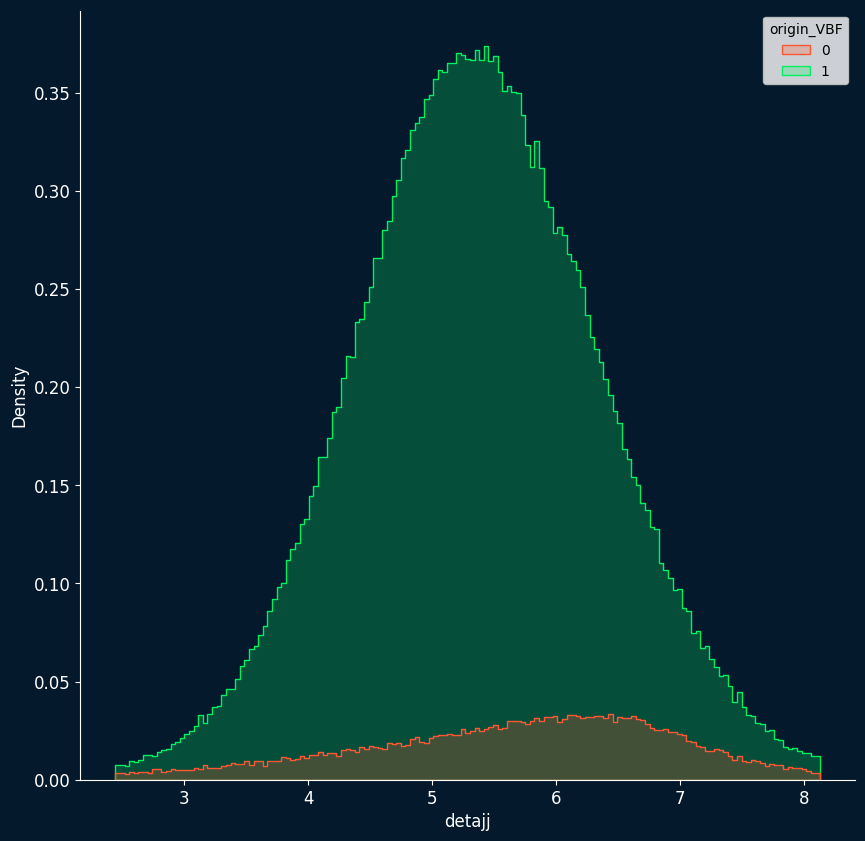

jet1_pt


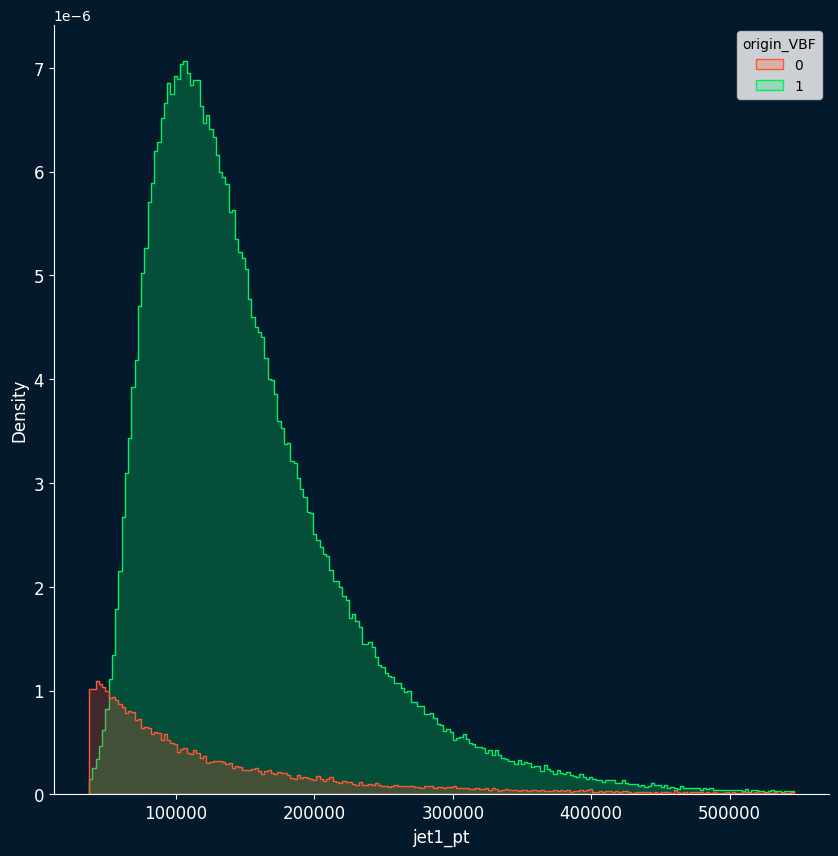

jet1_e


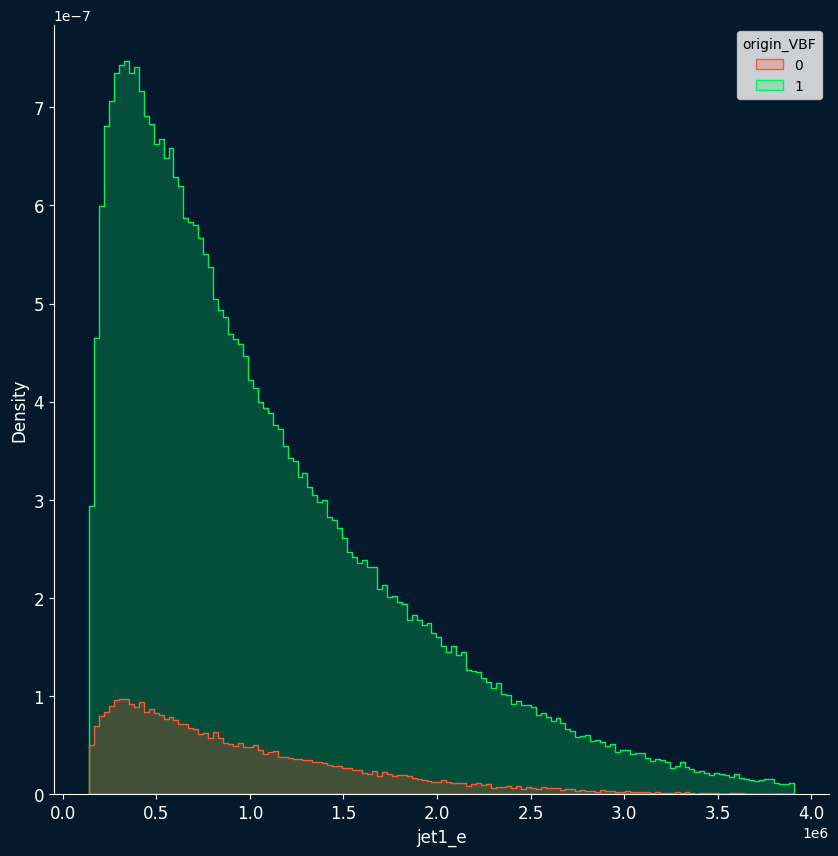

jet2_pt


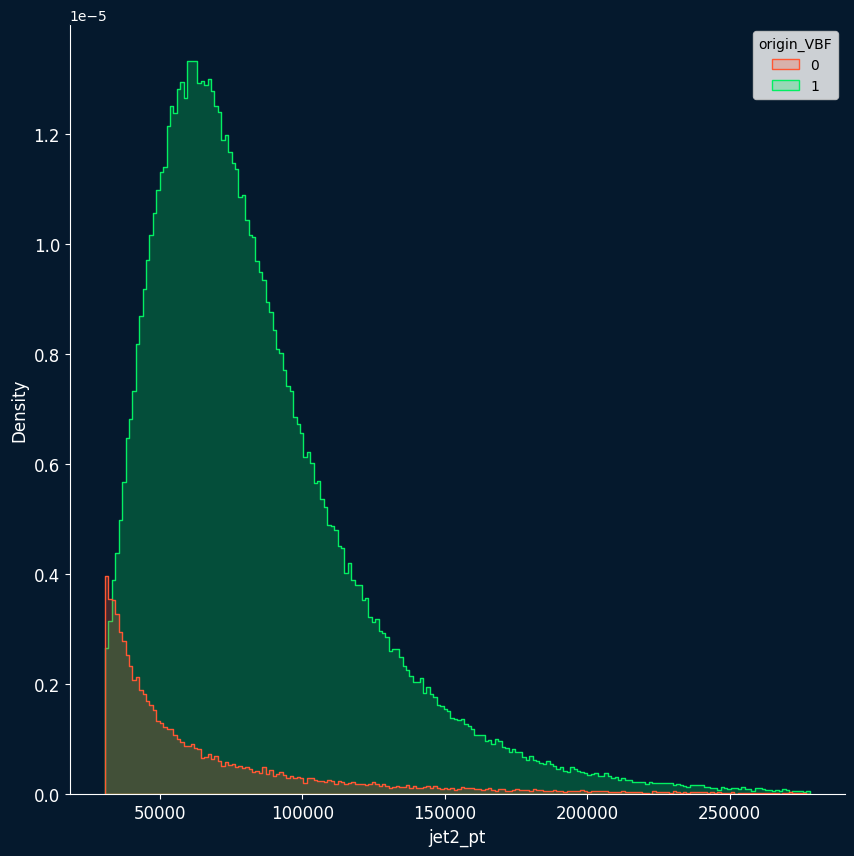

jet2_e


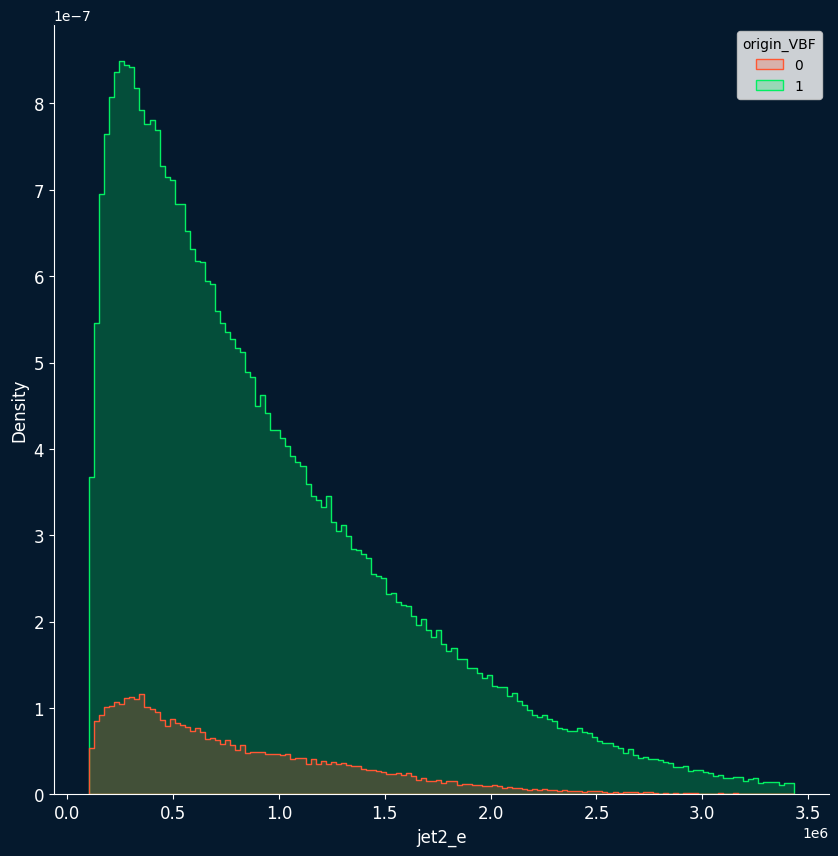

origin_VBF


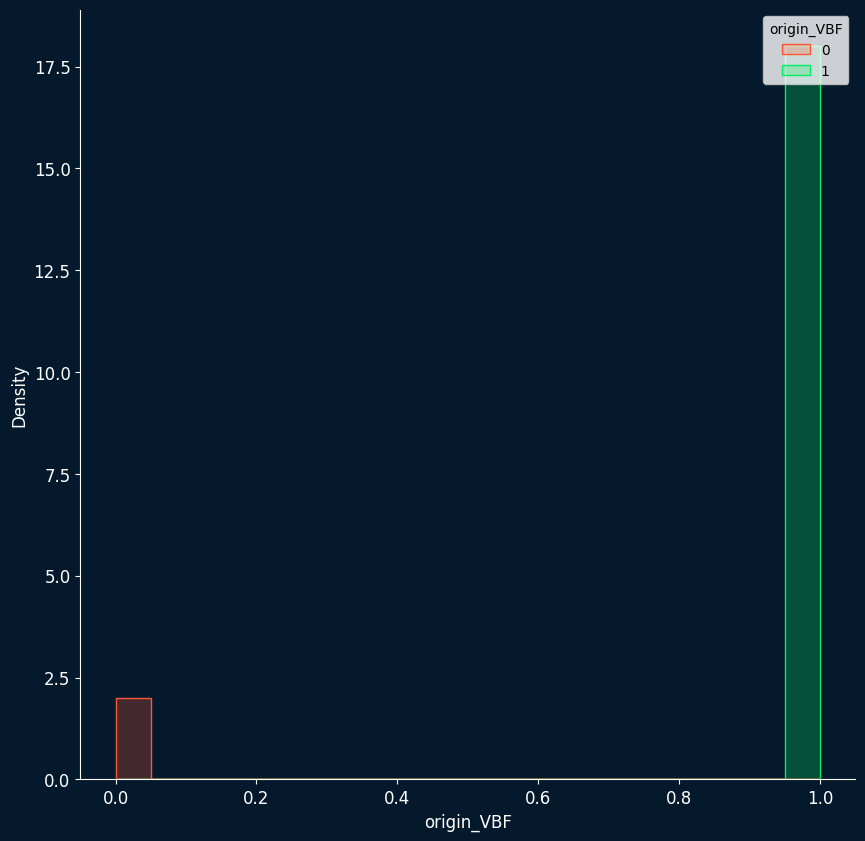

In [41]:
df_ml5 = df_ml.drop(['jet2_eta', 'jet1_eta', 'jet2_phi', 'MET', 'origin_ggF', 'dphijj', 'jet1_phi'], axis=1)
df_ml5 = df_ml5[df_ml5['mjj'] > 900].copy(deep=True)
df_ml5 = df_ml5.drop(['mjj'], axis=1)

df_X_5 = df_ml5.drop(['origin_VBF'], axis=1) 
df_y_5 = df_ml5[["origin_VBF"]]

# separo entre datos de entrenamiento y datos de validacion
X_train_5, X_metrico_5, y_train_5, y_metrico_5 = train_test_split(df_X_5, df_y_5, test_size=0.3, random_state=228)
X_test_5, X_val_5, y_test_5, y_val_5 = train_test_split(X_metrico_5, y_metrico_5, test_size=0.5, random_state=228)
graficar_todos_datos(df_ml5, color='origin_VBF')

In [43]:
X_test_5.describe()

,detajj,jet1_pt,jet1_e,jet2_pt,jet2_e
count,60077.000000,6.007700e+04,6.007700e+04,60077.000000,6.007700e+04
mean,5.386377,1.518811e+05,1.072183e+06,83466.437500,9.271103e+05
std,1.057382,8.798320e+04,7.823804e+05,44176.574219,6.875722e+05
min,0.024695,3.005420e+04,9.184362e+04,30002.447266,4.832735e+04
25%,4.703257,9.564443e+04,4.726216e+05,54909.808594,3.951161e+05
50%,5.382225,1.314547e+05,8.528389e+05,73528.703125,7.408839e+05
75%,6.082702,1.828731e+05,1.471111e+06,99656.570312,1.284922e+06
max,9.194850,1.768984e+06,6.061900e+06,977842.625000,5.364323e+06


In [45]:
precision(modelo, X_test_5, y_test_5)

Precisión del modelo: 91.77%


In [54]:
from sklearn.metrics import f1_score
y_pred_5 = modelo.predict(X_test_5)
f1_score(y_test_5, y_pred_5>0.5)

0.9557531624053962

In [46]:
y_pred_5 = modelo.predict(X_test_5)
y_pred_5 = y_pred_5>0.5
matriz_5 = confusion(y_test_5, y_pred_5)
pd.DataFrame(matriz_5)

,0,1
0,53418,564
1,4382,1713


In [47]:
eficiencia_antes = eficiencia_corte_matriz(matriz_5)
print(eficiencia_corte_matriz(matriz_5))

0.9620986400785658


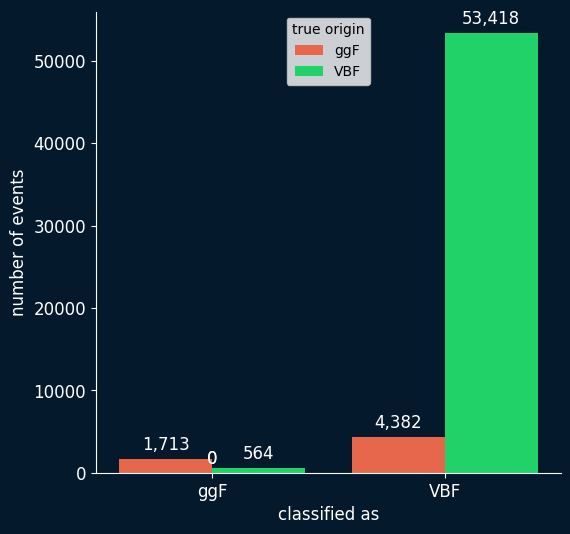

In [48]:
plot_confusion_barras(matriz_5, normalizado=False)

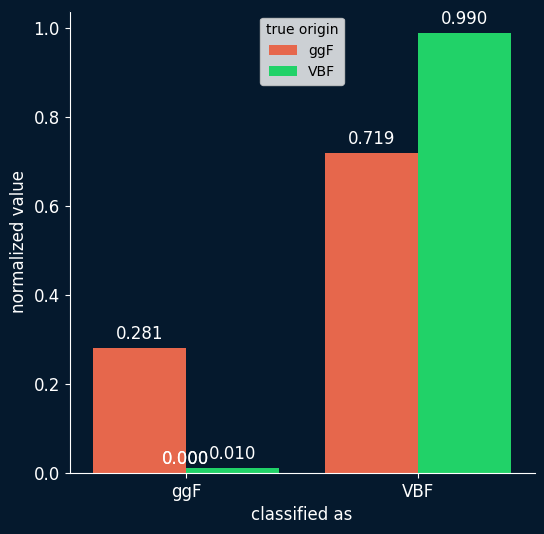

In [49]:
plot_confusion_barras(matriz_5)

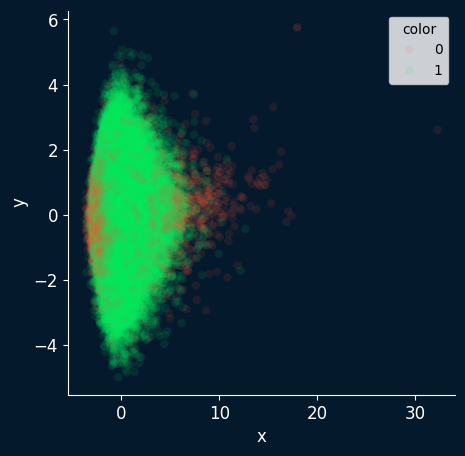

In [50]:
plot_pca_2D(modelo, 
            df_X_5.sample(100000, random_state=123), 
            df_y_5.sample(100000, random_state=123))

0         True
1        False
2         True
3         True
4         True
         ...  
60072     True
60073    False
60074     True
60075     True
60076     True
Name: prediccion, Length: 60077, dtype: bool
detajj


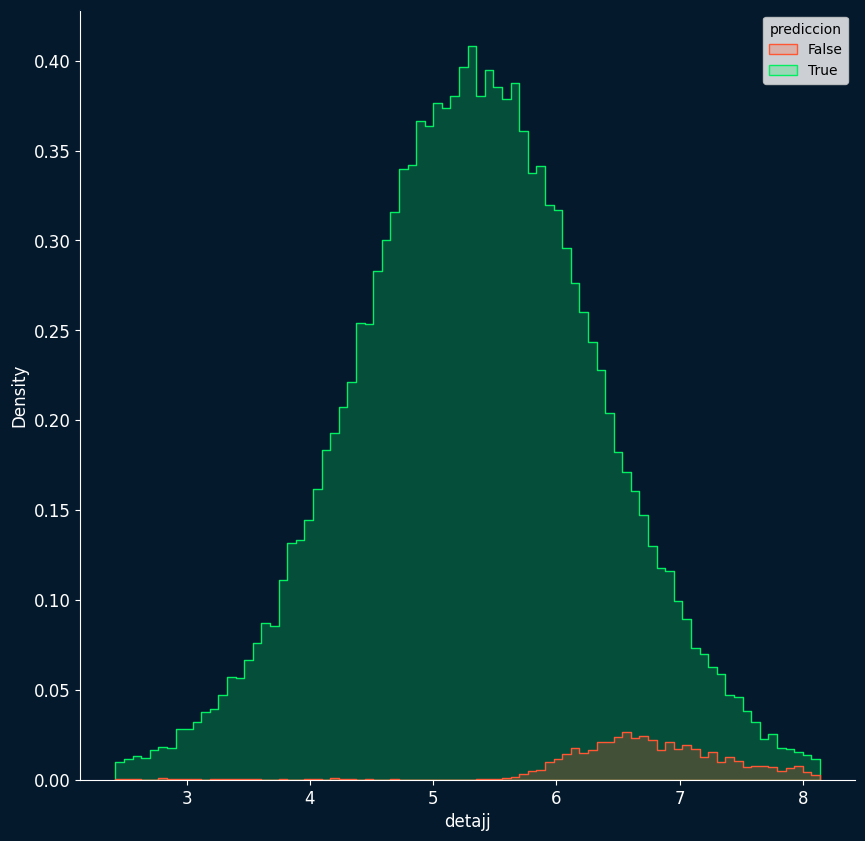

jet1_pt


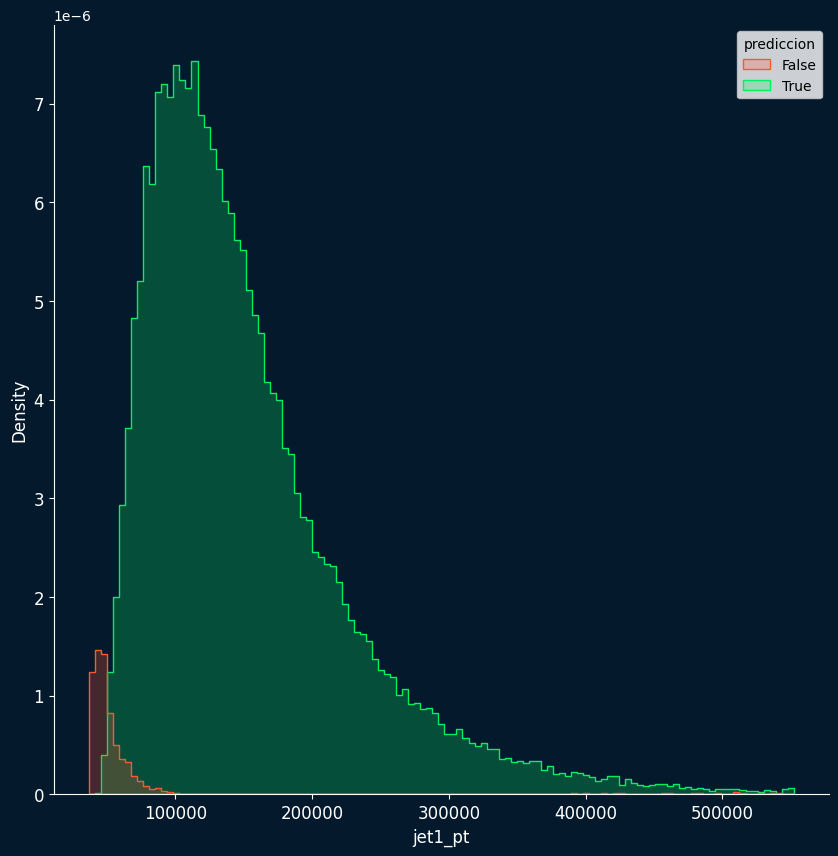

jet1_e


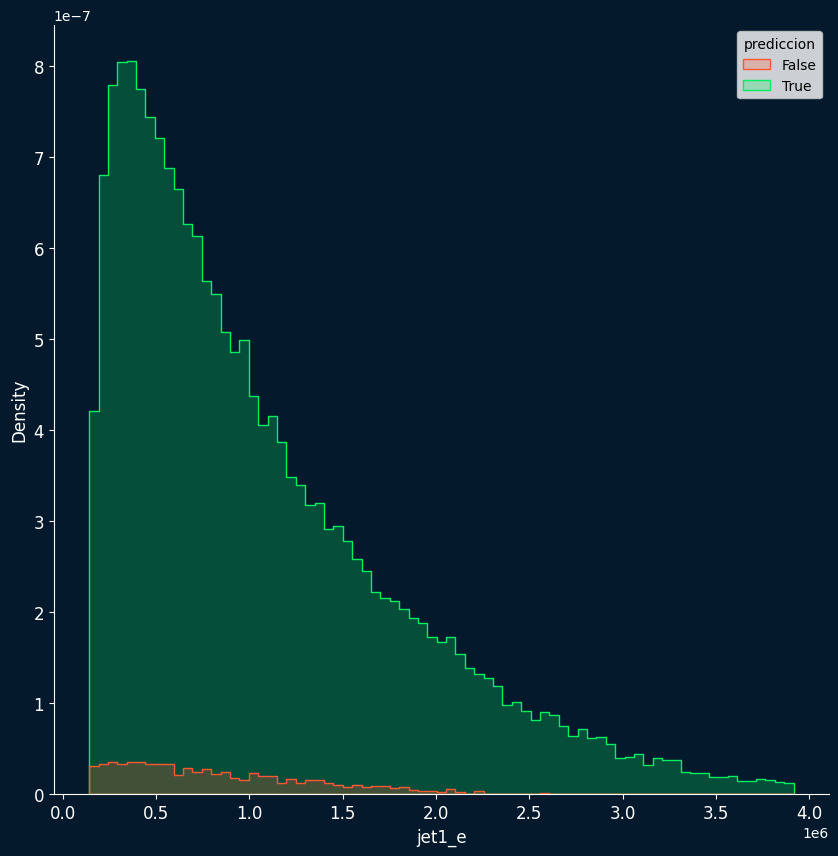

jet2_pt


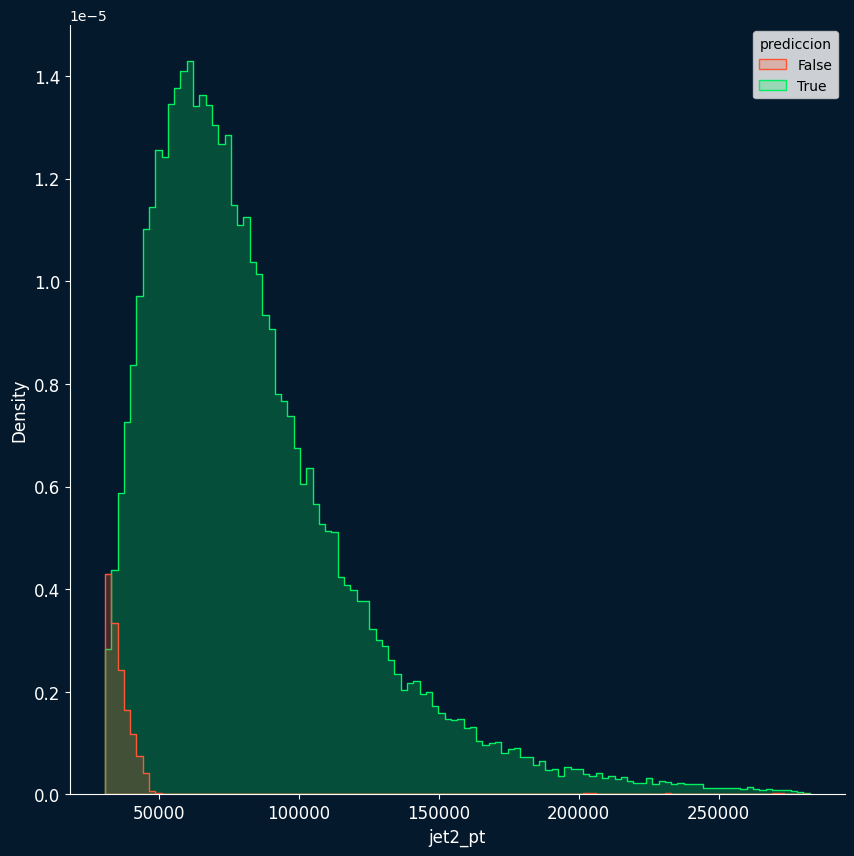

jet2_e


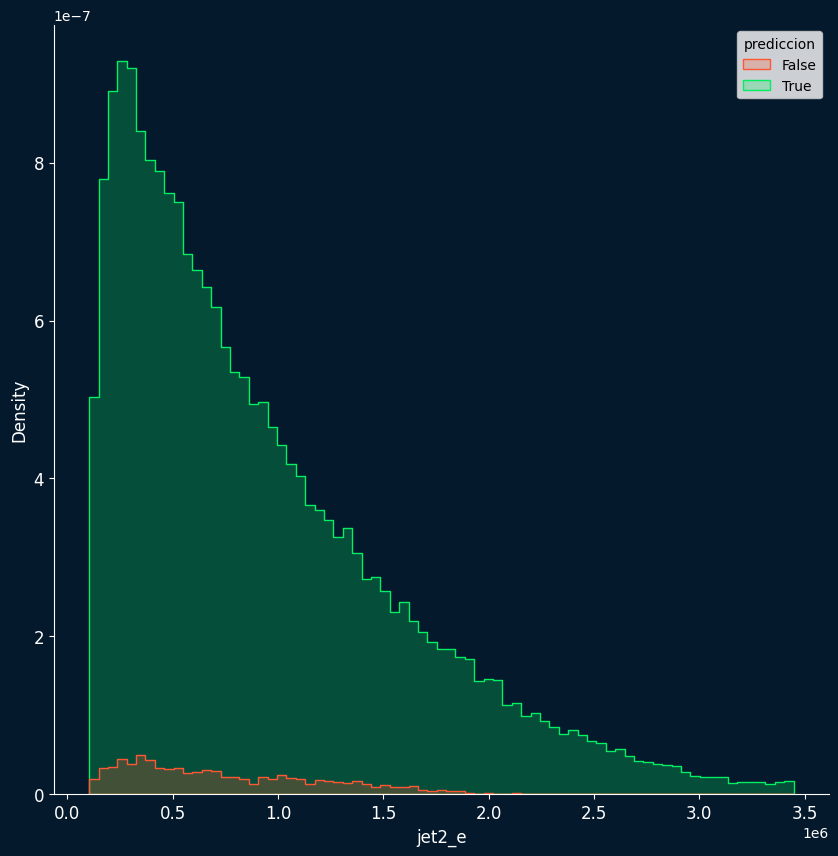

prediccion


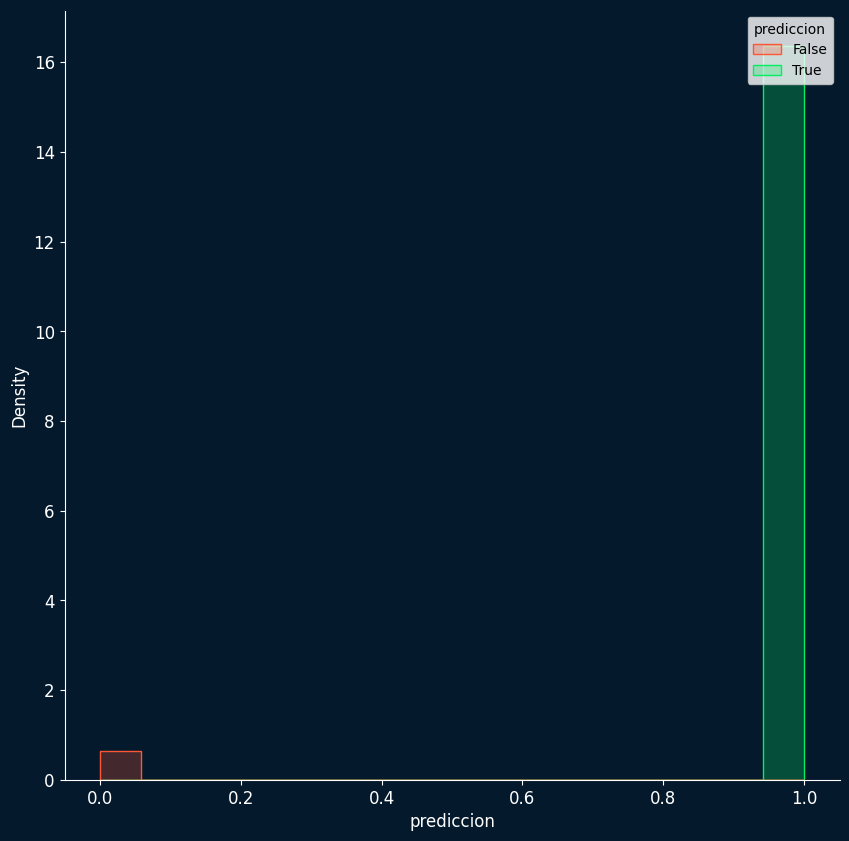

In [52]:
df_ml6 = X_test_5.copy(deep=True)
df_ml6 = df_ml6.reset_index(drop=True) # tengo que poner eso porque al ser elegido aleatoriamente, los indices quedan aleatorios y causa problemas con otros df en la función que sigue
try: 
    df_ml6 = df_ml6.drop(['prediccion'], axis=1) # por si lo corro 2 veces y se queda guardado 'prediccion'
except:
    # df_ml6['prediccion'] = aplicar_clasificacion_despues(model, df_ml6)
    df_ml6['prediccion'] = modelo.predict(df_ml6)>0.5
print(df_ml6['prediccion'])
graficar_todos_datos(df_ml6, color='prediccion')